# How to handle missing values and noises in market data

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # will be used to show complete date in linear graph, x axis

In [29]:
# import data
Data = pd.read_csv("D:\Scientific Topics\AI\IMT1.ir_Machine Learning\Data\Market_pro02.csv")
Data

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,12/31/1965,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1/3/1966,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1/4/1966,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1/5/1966,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1/6/1966,532.070007,532.070007,532.070007,532.070007,532.070007,0.0
...,...,...,...,...,...,...,...,...
112452,N100,5/27/2021,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0
112453,N100,5/28/2021,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0
112454,N100,5/31/2021,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0
112455,N100,6/1/2021,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0


In [30]:
# Define dataframe
df = pd.DataFrame(Data)

In [31]:
# Selection according to a specific value, here "NYA"
df1 = df[df["Index"] == 'NYA']

In [32]:
# to know general information about data
df1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,13947.000000,13946.000000,13945.000000,13944.000000,13938.000000,1.394700e+04
mean,4452.147406,4469.312526,4434.262223,4453.026486,4455.094446,1.215565e+09
std,4074.835507,4094.956718,4052.815490,4075.483921,4075.456765,1.834155e+09
min,347.769989,347.769989,347.769989,347.769989,347.769989,0.000000e+00
25%,654.989990,655.150024,655.039978,655.122513,655.807525,0.000000e+00
50%,2631.909912,2632.280029,2631.909912,2632.015014,2633.015014,0.000000e+00
75%,7339.489990,7376.315063,7277.509766,7339.397583,7342.787598,2.681975e+09
max,16590.429690,16685.890630,16531.949220,16590.429690,16590.429690,1.145623e+10


In [33]:
# is there any null data?
df1.isnull().sum()

Index         0
Date          0
Open          1
High          2
Low           3
Close         4
Adj Close    10
Volume        1
dtype: int64

In [34]:
# drop NaN data
df2 = df1.dropna()
df2

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,12/31/1965,528.690002,528.690002,528.690002,528.690002,528.690002,0.000000e+00
1,NYA,1/3/1966,527.210022,527.210022,527.210022,527.210022,527.210022,0.000000e+00
2,NYA,1/4/1966,527.840027,527.840027,527.840027,527.840027,527.840027,0.000000e+00
3,NYA,1/5/1966,531.119995,531.119995,531.119995,531.119995,531.119995,0.000000e+00
4,NYA,1/6/1966,532.070007,532.070007,532.070007,532.070007,532.070007,0.000000e+00
...,...,...,...,...,...,...,...,...
13943,NYA,5/24/2021,16375.000000,16508.519530,16375.000000,16464.689450,16464.689450,2.947400e+09
13944,NYA,5/25/2021,16464.689450,16525.810550,16375.150390,16390.189450,16390.189450,3.420870e+09
13945,NYA,5/26/2021,16390.189450,16466.339840,16388.320310,16451.960940,16451.960940,3.674490e+09
13946,NYA,5/27/2021,16451.960940,16546.359380,16451.960940,16531.949220,16531.949220,5.201110e+09


In [35]:
# Check the type of all columns
df2.dtypes

Index         object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [36]:
# One way: converting float to int:
df3 = df2.astype({'Open': int,'High': int, 'Low': int, 'Close': int, 'Adj Close': int, 'Volume': int})
df3

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,12/31/1965,528,528,528,528,528,0
1,NYA,1/3/1966,527,527,527,527,527,0
2,NYA,1/4/1966,527,527,527,527,527,0
3,NYA,1/5/1966,531,531,531,531,531,0
4,NYA,1/6/1966,532,532,532,532,532,0
...,...,...,...,...,...,...,...,...
13943,NYA,5/24/2021,16375,16508,16375,16464,16464,-2147483648
13944,NYA,5/25/2021,16464,16525,16375,16390,16390,-2147483648
13945,NYA,5/26/2021,16390,16466,16388,16451,16451,-2147483648
13946,NYA,5/27/2021,16451,16546,16451,16531,16531,-2147483648


In [37]:
# Another way: omitting decimals but still float not int! using np.floor
# df3 = df2[['Open','High', 'Low', 'Close', 'Adj Close', 'Volume']].apply(np.floor)
# print(df3.dtypes)
# df3

In [38]:
# If we use np.floor, we should add the rest of the columns we need, for example "Date" here: 
# Add Date column to our new df --> df3
# df3["Date"] = df2["Date"]
# df3

In [39]:
# rename columns name:
# df3.rename(columns={'Adj Close': 'Adj_Close'}, inplace=True)

In [40]:
# Convert column to DateTime:
df3['Date'] = pd.to_datetime(df3['Date'])

In [41]:
# Add 3 separate columns of data to df3:
df3['Day'] = df3['Date'].dt.day
df3['Month'] = df3['Date'].dt.month
df3['Year'] = df3['Date'].dt.year

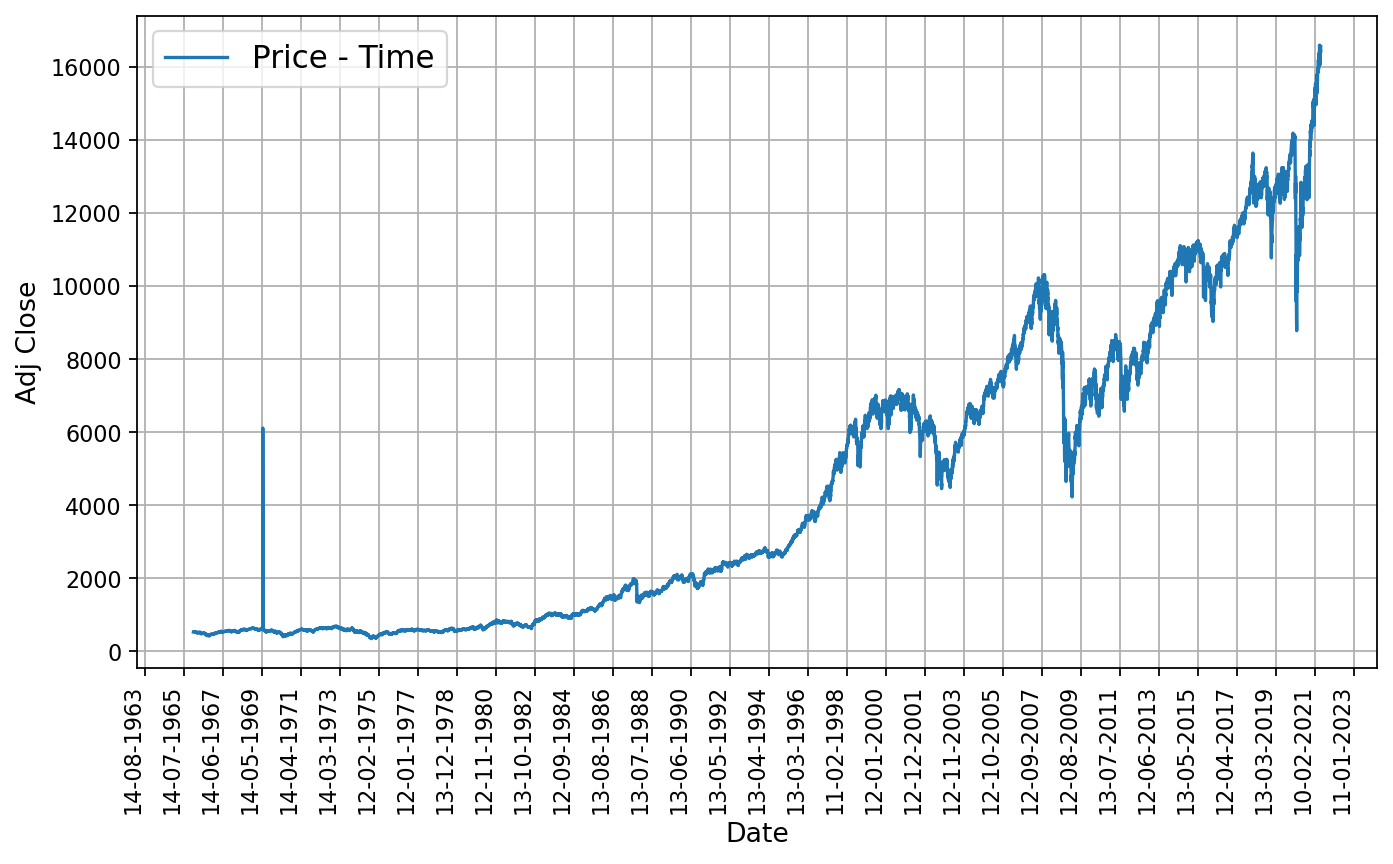

In [43]:
# linear plot of data, time series of "Adj Close":

plt.figure(figsize = (10,6), dpi = 160)
plt.plot(df3['Date'], df3['Adj Close'])
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Adj Close', fontsize = 12)
#plt.title("Price - Time")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=700))
plt.gcf().autofmt_xdate()
plt.xticks(rotation = 90)

plt.legend(['Price - Time'], loc ="best", fontsize = 14)  # loc ="lower right"-->location of legend
plt.grid()

plt.savefig('D:\Scientific Topics\AI\IMT1.ir_Machine Learning\My_Projects\Market/timeseres_with.jpg')
plt.show()

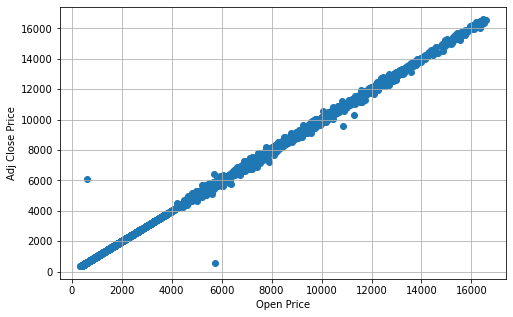

In [44]:
# Scatter plot of Open and Adj Close
plt.figure (figsize = (8, 5))
plt.scatter(df3['Open'], df3['Adj Close'])
plt.xlabel('Open Price')
plt.ylabel('Adj Close Price')
plt.grid()

plt.savefig("D:\Scientific Topics\AI\IMT1.ir_Machine Learning\My_Projects\Market/open.jpg")
plt.show()

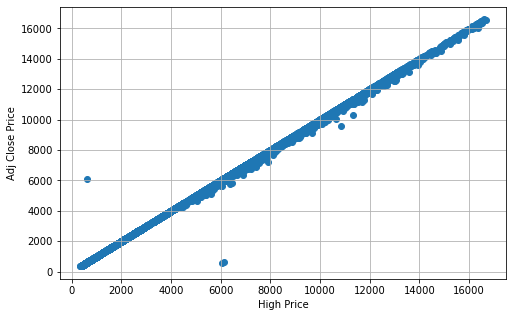

In [45]:
# Scatter plot of High and Adj Close
plt.figure (figsize = (8, 5))
plt.scatter(df3['High'], df3['Adj Close'])
plt.xlabel('High Price')
plt.ylabel('Adj Close Price')
plt.grid()

plt.savefig("D:\Scientific Topics\AI\IMT1.ir_Machine Learning\My_Projects\Market/High.jpg")
plt.show()

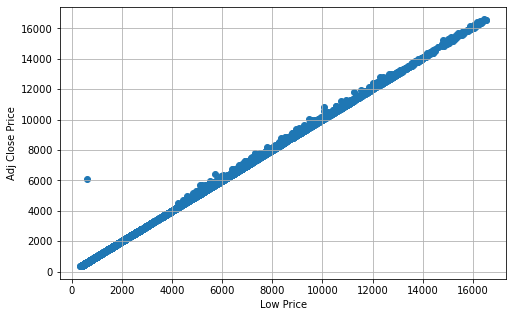

In [46]:
# Scatter plot of Low and Adj Close
plt.figure (figsize = (8, 5))
plt.scatter(df3['Low'], df3['Adj Close'])
plt.xlabel('Low Price')
plt.ylabel('Adj Close Price')
plt.grid()

plt.savefig("D:\Scientific Topics\AI\IMT1.ir_Machine Learning\My_Projects\Market/low.jpg")
plt.show()

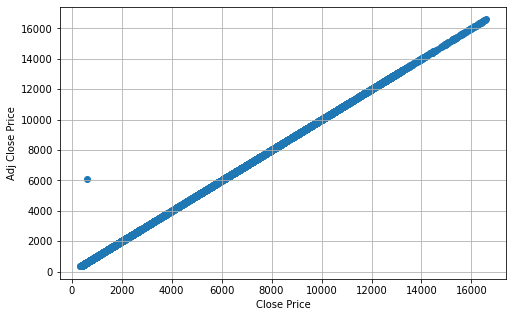

In [47]:
# Scatter plot of Close and Adj Close
plt.figure (figsize = (8, 5))
plt.scatter(df3['Close'], df3['Adj Close'])
plt.xlabel('Close Price')
plt.ylabel('Adj Close Price')
plt.grid()

plt.savefig("D:\Scientific Topics\AI\IMT1.ir_Machine Learning\My_Projects\Market/close.jpg")
plt.show()

In [48]:
# To know the index of noises. According to the above plots:

print(df3[(df3["Adj Close"]> 6000) & (df3["Year"] == 1969)].index)

print(df3[(df3["Adj Close"]> 6000) & (df3["Open"] < 2000)].index)
    
print(df3[(df3["Adj Close"]< 2000) & (df3["Open"] > 4000)].index)

print(df3[(df3["Adj Close"]> 6000) & (df3["High"] < 2000)].index)

print(df3[(df3["Adj Close"]< 2000) & (df3["High"] > 6000)].index)   

Int64Index([831], dtype='int64')
Int64Index([831], dtype='int64')
Int64Index([852], dtype='int64')
Int64Index([831], dtype='int64')
Int64Index([829, 833], dtype='int64')


In [49]:
# Drop the noises with related indexes:
DF = df3.drop(index = [831,852, 829, 833])    
DF

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,NYA,1965-12-31,528,528,528,528,528,0,31,12,1965
1,NYA,1966-01-03,527,527,527,527,527,0,3,1,1966
2,NYA,1966-01-04,527,527,527,527,527,0,4,1,1966
3,NYA,1966-01-05,531,531,531,531,531,0,5,1,1966
4,NYA,1966-01-06,532,532,532,532,532,0,6,1,1966
...,...,...,...,...,...,...,...,...,...,...,...
13943,NYA,2021-05-24,16375,16508,16375,16464,16464,-2147483648,24,5,2021
13944,NYA,2021-05-25,16464,16525,16375,16390,16390,-2147483648,25,5,2021
13945,NYA,2021-05-26,16390,16466,16388,16451,16451,-2147483648,26,5,2021
13946,NYA,2021-05-27,16451,16546,16451,16531,16531,-2147483648,27,5,2021


In [50]:
# \\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
# Plotting the data without noise and missing value
# ///////////////////////////////////////////////////////////////////

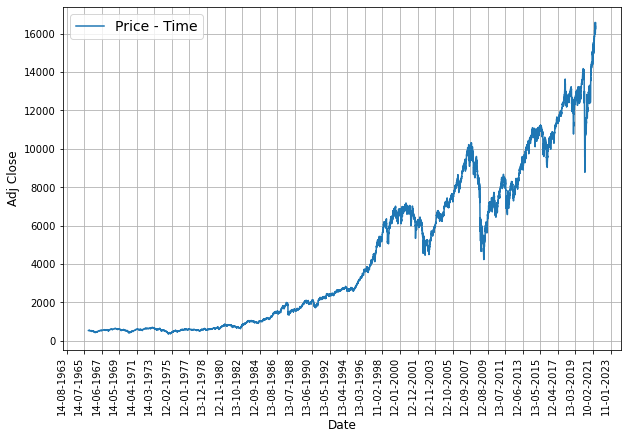

In [51]:
plt.figure(figsize = (10,7)) #, dpi = 150

plt.plot(DF['Date'], DF['Adj Close'])
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Adj Close', fontsize = 12)
plt.legend(['Price - Time'], loc ="best", fontsize = 14) #loc ="lower right"

#plt.title("Price - Time")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=700))
plt.gcf().autofmt_xdate()
plt.xticks(rotation = 90)

plt.savefig("D:\Scientific Topics\AI\IMT1.ir_Machine Learning\My_Projects\Market/timeseries_without.jpg")
plt.grid()
plt.show()

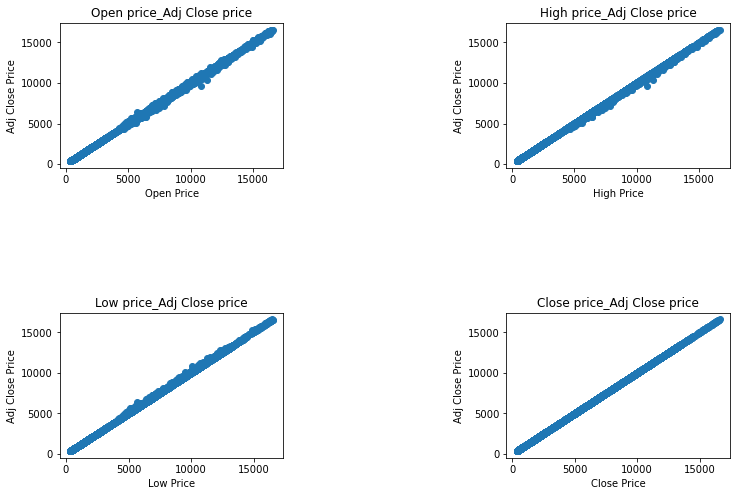

In [52]:
## Scatter plot of All data
#plt.clf()
fig = plt.figure(figsize = (12, 8))
fig.subplots_adjust(wspace=1)
fig.subplots_adjust(hspace=1)

plt.subplot(2, 2, 1) # row 2, col 2 index 1
plt.scatter(DF['Open'], DF['Adj Close'])
plt.title("Open price_Adj Close price")
plt.xlabel('Open Price')
plt.ylabel('Adj Close Price')

plt.subplot(2, 2, 2) # index 2
plt.scatter(DF['High'], DF['Adj Close'])
plt.xlabel('High Price')
plt.ylabel('Adj Close Price')
plt.title("High price_Adj Close price")

plt.subplot(2, 2, 3) # index 3
plt.scatter(DF['Low'], DF['Adj Close'])
plt.xlabel('Low Price')
plt.ylabel('Adj Close Price')
plt.title("Low price_Adj Close price")

plt.subplot(2, 2, 4) # index 4
plt.scatter(DF['Close'], DF['Adj Close'])
plt.xlabel('Close Price')
plt.ylabel('Adj Close Price')
plt.title("Close price_Adj Close price")

plt.savefig("D:\Scientific Topics\AI\IMT1.ir_Machine Learning\My_Projects\Market/all.jpg")
plt.show()